# MovieVerse 

## Overview


Your company would like to start a movie studio and is asking us to recommend the best way foward. The main objective of this project is to produce three actionable recommendations for your company to take into consideration. With these recommendations your company can create their own *successful* movie studio.

This project utilizes python for exploratory data analysis and python along with SQL for interacting with the data in the databases. 


### Data Sources 

The data is sourced from various movie data websites online:
> - Box Office Mojo
    > - Format: csv 
> - IMDB
    > - Format: Database
> -  The Numbers
    > - Format: csv

We joined all the relevant data as tables into the IMDB database in the exploratory notebook for easier access and analysis. 


In [4]:
# import neeeded libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load in the data.

In [5]:
# open connection to the database
conn = sqlite3.connect('/Users/ronnie/Documents/Flatiron/NYC_DS_112023/phase-2-project/zippedData/im.db')

In [3]:
# take a look at the tables in the database
pd.read_sql("""

SELECT name
FROM sqlite_master
WHERE type = "table"

""", conn)

NameError: name 'pd' is not defined

The database includes 10 tables with movie data that will be very helpful in our analysis.

## Average Profit Percentage by Genres

In [9]:
basics_budgets = pd.read_sql("""

SELECT *   
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres

""", conn)

# splits genres values by the comma to create list
basics_budgets['genres'] = basics_budgets['genres'].str.split(',')

# for each movie creates a record for each genre 
basics_budgets = basics_budgets.explode('genres')

# change worldwide gross column to type int
basics_budgets['worldwide_gross'] = basics_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
basics_budgets['production_budget'] = basics_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(int)
basics_budgets['avg_profit_perc'] = basics_budgets['worldwide_gross'] / basics_budgets['production_budget']

# group by genres and select profit for that genre
genre_by_profit = basics_budgets.groupby('genres')['avg_profit_perc'].mean().sort_values(ascending = False).to_frame()
genre_by_profit

,avg_profit_perc
genres,
Family,3.831503
Thriller,3.796146
Crime,3.641379
Fantasy,3.309361
Drama,3.250494
Horror,3.246080
Musical,2.778568
Animation,2.707194
Romance,2.690754


/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

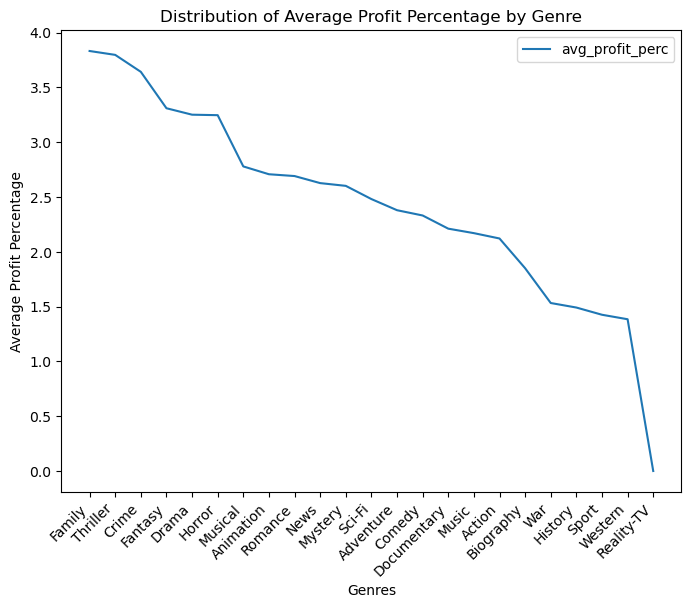

In [10]:
# Create figure
fig, ax = plt.subplots(figsize = (8,6))

# Create the line plot
sns.lineplot(data=genre_by_profit)

# Set the x-axis tick positions and labels
plt.xticks(range(len(genre_by_profit.index)), genre_by_profit.index, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Average Profit Percentage')
plt.title('Distribution of Average Profit Percentage by Genre')


# Show the plot
plt.show()

## Popular Directors, Writers and Actors

In [ ]:
# get top directors
directors = pd.read_sql("""

WITH RECURSIVE split(genre, str) AS (
    SELECT '', genres || ',' FROM movie_basics
    UNION ALL SELECT
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
)
SELECT DISTINCT 
                p.primary_name AS director,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / 
                                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM split
JOIN movie_basics AS m
    ON instr(genres, genre) > 0
    
JOIN directors AS d
    ON m.movie_id = d.movie_id
JOIN persons AS p
    ON d.person_id = p.person_id
JOIN tn_movie_budgets AS t
    ON t.movie = m.primary_title
    
WHERE genre!='' AND genre = "Family"
GROUP BY director
ORDER BY average_profit_perc DESC
LIMIT 10    

""", conn)
directors

In [ ]:
# get top writers
writers = pd.read_sql("""

WITH RECURSIVE split(genre, str) AS (
    SELECT '', genres || ',' FROM movie_basics
    UNION ALL SELECT
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
)

SELECT DISTINCT 
                p.primary_name AS writer,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / 
                                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM split
JOIN movie_basics AS m
    ON instr(genres, genre) > 0
    
JOIN writers AS w
    ON m.movie_id = w.movie_id
JOIN persons AS p
    ON w.person_id = p.person_id
JOIN tn_movie_budgets AS t
    ON t.movie = m.primary_title
    
WHERE genre!='' AND genre = "Family"
GROUP BY writer
ORDER BY average_profit_perc DESC
LIMIT 10
""", conn)
writers

In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [ ]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

color1 = "#9A4BC2"
color2 = "#3575A4"
color_gradient = get_color_gradient(color1, color2, len(writers))

# Histogram for directors
sns.barplot(data=directors, x='director', y='average_profit_perc', palette=color_gradient, ax=ax1)
ax1.set_xticklabels(directors['director'], rotation=45, ha='right')
ax1.set_xlabel('Directors')
ax1.set_ylabel('Average Profit Percentage')
ax1.set_title('Distribution of Average Profit Percentage for Directors')

# Histogram for writers
sns.barplot(data=writers, x='writer', y='average_profit_perc', palette=color_gradient, ax=ax2)
ax2.set_xticklabels(writers['writer'], rotation=45, ha='right')
ax2.set_xlabel('Writers')
ax2.set_ylabel('Average Profit Percentage')
ax2.set_title('Distribution of Average Profit Percentage for Writers')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# get top actors
actors = pd.read_sql("""

SELECT p.primary_name AS actor,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / 
                                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM persons AS p
    JOIN known_for AS k
        ON p.person_id = k.person_id
    JOIN movie_basics AS m
        ON k.movie_id = m.movie_id
    JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
WHERE primary_profession LIKE '%actor%' AND
                genres LIKE '%Family%'
GROUP BY actor
ORDER BY average_profit_perc DESC
LIMIT 10

""", conn)

In [ ]:
# Create figure
fig, (ax1) = plt.subplots( figsize=(8, 6))

# create bar plot for actors
sns.barplot(data=actors, x='actor', y='average_profit_perc', palette=color_gradient, ax=ax1)

# set labels
ax1.set_xticklabels(actors['actor'], rotation=45, ha='right')
ax1.set_xlabel('Actors')
ax1.set_ylabel('Average Profit Percentage')
ax1.set_title('Distribution of Average Profit Percentage for Actors');

### Industry Profitiablilty and Budget by Year

grouping by year and looking at some profitability metrics

In [11]:
box_office_mojo_groupby_year = pd.read_sql("""

SELECT year, 
        SUM(domestic_gross) AS total_domestic_gross, 
        SUM(foreign_gross) AS total_foreign_gross
FROM box_office_mojo
GROUP BY year

""", conn)

box_office_mojo_groupby_year

,year,total_domestic_gross,total_foreign_gross
0,2010,1.015274e+10,1.436937e+10
1,2011,9.915690e+09,1.566287e+10
2,2012,1.069786e+10,1.700298e+10
3,2013,1.055885e+10,1.658024e+10
4,2014,1.014798e+10,1.695667e+10
5,2015,1.074487e+10,1.515435e+10
6,2016,1.086969e+10,1.898139e+10
7,2017,1.051677e+10,1.992893e+10
8,2018,1.076436e+10,1.747449e+10


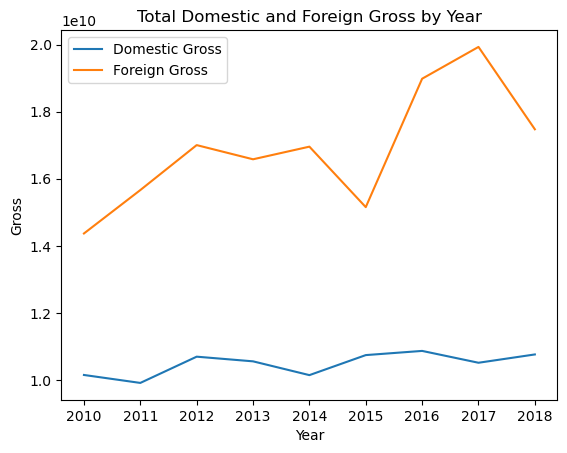

In [12]:
# Plot the data as a line graph
plt.plot(box_office_mojo_groupby_year['year'], box_office_mojo_groupby_year['total_domestic_gross'], label='Domestic Gross')
plt.plot(box_office_mojo_groupby_year['year'], box_office_mojo_groupby_year['total_foreign_gross'], label='Foreign Gross')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Total Domestic and Foreign Gross by Year')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [13]:
movie_basics_groupby_year = pd.read_sql("""

SELECT m.start_year,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY m.start_year

""", conn)

movie_basics_groupby_year

,start_year,genre_count,average_worldwide_gross,average_production_budget,average_profit_perc
0,2010,352,9.266885e+07,3.296624e+07,2.811023
1,2011,393,9.568334e+07,3.417800e+07,2.799559
2,2012,378,9.840677e+07,3.355199e+07,2.932963
3,2013,395,9.066837e+07,3.255225e+07,2.785318
4,2014,458,8.635058e+07,2.858423e+07,3.020917
5,2015,457,7.426570e+07,2.731386e+07,2.718975
6,2016,394,1.010288e+08,3.341628e+07,3.023340
7,2017,367,1.044480e+08,3.652808e+07,2.859390
8,2018,343,1.228439e+08,3.663125e+07,3.353528
9,2019,185,7.307353e+07,3.241184e+07,2.254532


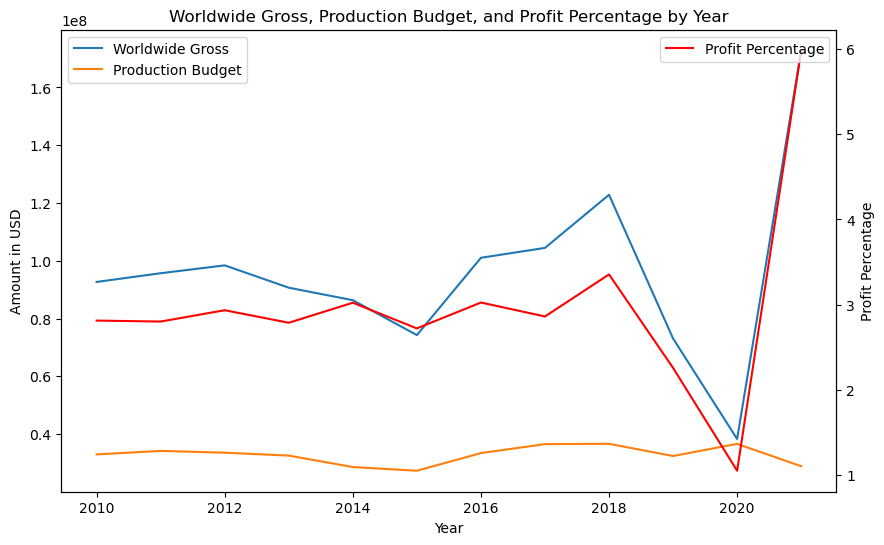

In [14]:
df = movie_basics_groupby_year

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget on the first y-axis
ax1.plot(df['start_year'], df['average_worldwide_gross'], label='Worldwide Gross')
ax1.plot(df['start_year'], df['average_production_budget'], label='Production Budget')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in USD')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(df['start_year'], df['average_profit_perc'], color='red', label='Profit Percentage')
ax2.set_ylabel('Profit Percentage')

# Set the title
plt.title('Worldwide Gross, Production Budget, and Profit Percentage by Year')

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

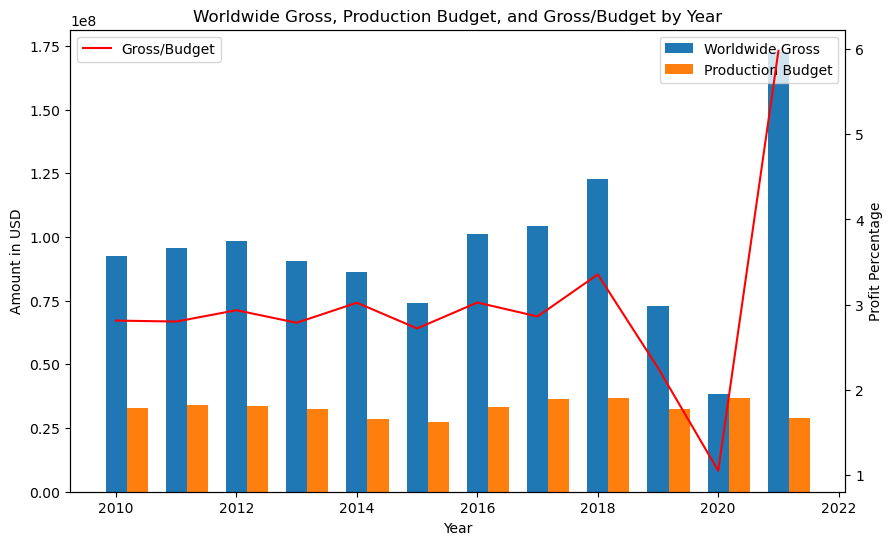

In [15]:
df = movie_basics_groupby_year

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
year = df['start_year']
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(year, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(year + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(year, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Profit Percentage')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget by Year')

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Set the x-axis tick labels
ax1.set_xticks(year)
ax1.set_xticklabels(year, rotation=45)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

### Profit by Month

group profit and budget totals by Month and graph


In [17]:
# Execute the SQL query and retrieve the results into a DataFrame
movie_basics_groupby_month = pd.read_sql("""
    SELECT substr(t.release_date, 1, 3) AS month,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
        AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
    FROM tn_movie_budgets AS t
    GROUP BY month
    ORDER BY CASE month
        WHEN 'Jan' THEN 1
        WHEN 'Feb' THEN 2
        WHEN 'Mar' THEN 3
        WHEN 'Apr' THEN 4
        WHEN 'May' THEN 5
        WHEN 'Jun' THEN 6
        WHEN 'Jul' THEN 7
        WHEN 'Aug' THEN 8
        WHEN 'Sep' THEN 9
        WHEN 'Oct' THEN 10        WHEN 'Nov' THEN 11
        WHEN 'Dec' THEN 12
        ELSE 999
    END;
""", conn)

movie_basics_groupby_month

,month,average_worldwide_gross,average_production_budget,average_profit_perc
0,Jan,4.656382e+07,2.084349e+07,2.233974
1,Feb,7.154453e+07,2.804642e+07,2.550933
2,Mar,8.063337e+07,3.078208e+07,2.619491
3,Apr,5.992026e+07,2.380283e+07,2.517359
4,May,1.622680e+08,4.713520e+07,3.442608
5,Jun,1.425230e+08,4.309912e+07,3.306866
6,Jul,1.409636e+08,4.254616e+07,3.313193
7,Aug,6.097841e+07,2.555609e+07,2.386061
8,Sep,4.669369e+07,2.181290e+07,2.140645
9,Oct,4.946456e+07,2.039266e+07,2.425606


ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

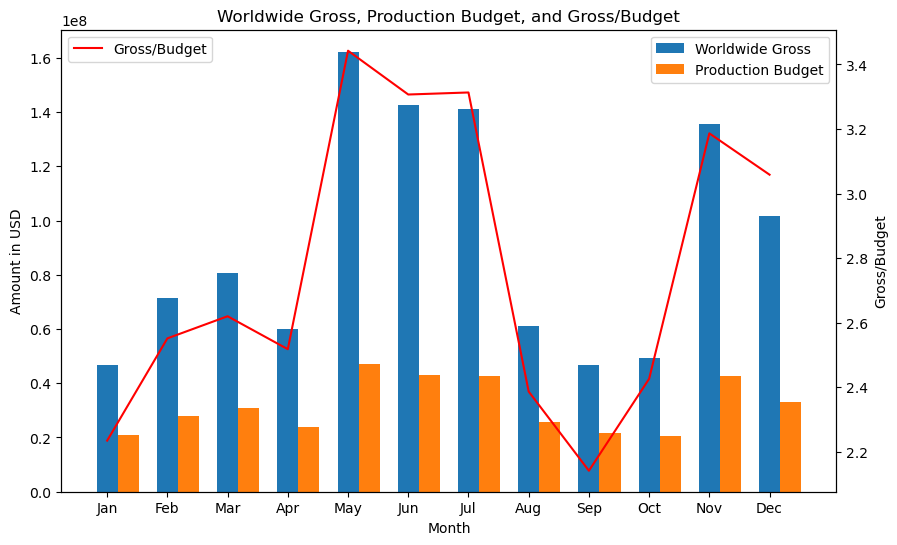

In [18]:
import numpy as np
df = movie_basics_groupby_month

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
month = np.arange(len(df['month']))
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(month, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(month + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(month, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Gross/Budget')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget')

# Set the x-axis tick labels
ax1.set_xticks(month)
ax1.set_xticklabels(df['month'])

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

It appears that worldwide movie Gross Revenue surges twice during the year: May-June-Jul and Nov-Dec, 
corresponding to the early summer months and the holiday season

### Profit by Month of Year, only for movies with "Family" as one of the genres

In [19]:
# Execute the SQL query and retrieve the results into a DataFrame
movie_basics_groupby_month_family = pd.read_sql("""
    SELECT substr(t.release_date, 1, 3) AS month,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
        AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
    FROM tn_movie_budgets AS t
    JOIN movie_basics AS m
        ON t.movie = m.primary_title
    WHERE m.genres LIKE '%Family%'
    GROUP BY month
    ORDER BY CASE month
        WHEN 'Jan' THEN 1
        WHEN 'Feb' THEN 2
        WHEN 'Mar' THEN 3
        WHEN 'Apr' THEN 4
        WHEN 'May' THEN 5
        WHEN 'Jun' THEN 6
        WHEN 'Jul' THEN 7
        WHEN 'Aug' THEN 8
        WHEN 'Sep' THEN 9
        WHEN 'Oct' THEN 10        WHEN 'Nov' THEN 11
        WHEN 'Dec' THEN 12
        ELSE 999
    END;
""", conn)

movie_basics_groupby_month_family

,month,average_worldwide_gross,average_production_budget,average_profit_perc
0,Jan,6.016560e+07,3.777778e+07,1.592619
1,Feb,7.584884e+07,2.944785e+07,2.575700
2,Mar,2.878402e+08,7.656464e+07,3.759440
3,Apr,7.142240e+07,2.055714e+07,3.474335
4,May,2.894731e+08,1.043818e+08,2.773214
5,Jun,1.630996e+08,4.335714e+07,3.761769
6,Jul,1.321625e+08,5.318750e+07,2.484841
7,Aug,3.647679e+07,1.802500e+07,2.023678
8,Sep,1.206408e+08,4.103333e+07,2.940069
9,Oct,5.496249e+07,2.908250e+07,1.889882


ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

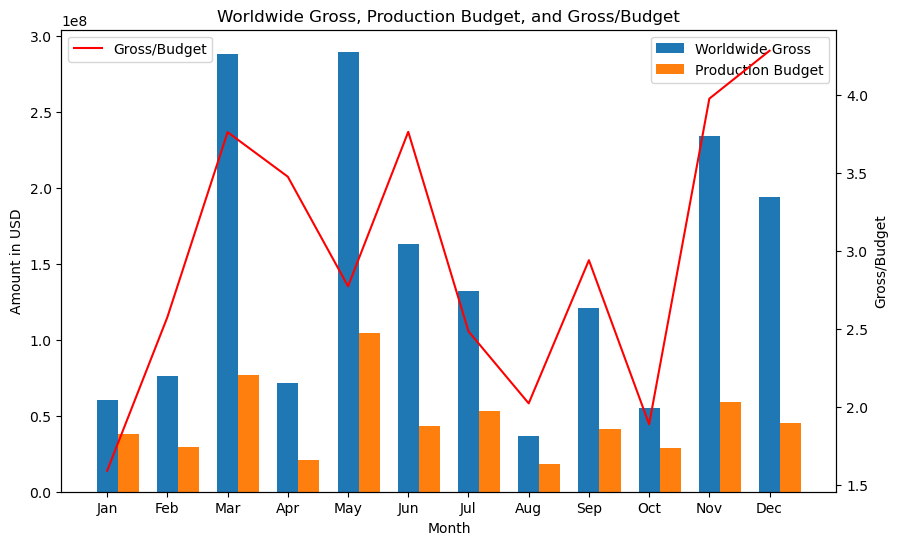

In [20]:
import numpy as np
df = movie_basics_groupby_month_family

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
month = np.arange(len(df['month']))
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(month, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(month + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(month, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Gross/Budget')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget')

# Set the x-axis tick labels
ax1.set_xticks(month)
ax1.set_xticklabels(df['month'])

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

### Histogram: distribution of Movie runtimes



In [21]:
df = pd.read_sql("""

SELECT runtime_minutes,
        (CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS worldwide_gross,
        (CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS production_budget,
        (CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / (CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS profit_perc
    FROM tn_movie_budgets AS t
    JOIN movie_basics AS m
        ON t.movie = m.primary_title

""", conn)

df

,runtime_minutes,worldwide_gross,production_budget,profit_perc
0,93.0,2776345279,425000000,6
1,136.0,1045663875,410600000,2
2,113.0,149762350,350000000,0
3,141.0,1403013963,330600000,4
4,149.0,2048134200,300000000,6
...,...,...,...,...
3810,93.0,94596,10000,9
3811,NaN,527,10000,0
3812,95.0,4584,9000,0
3813,77.0,0,7000,0


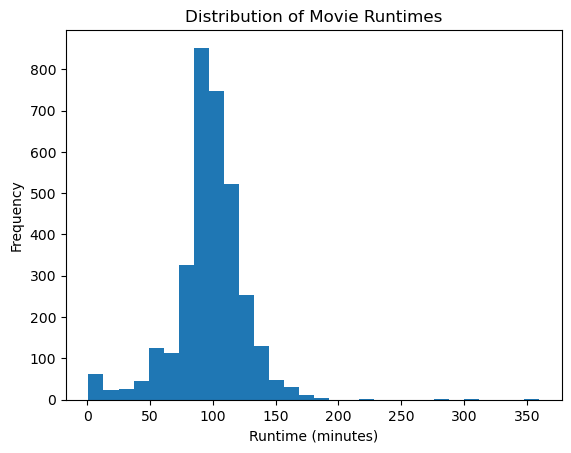

In [22]:
# Create a histogram
plt.hist(df['runtime_minutes'], bins=30)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

### Gross Revenue by Runtime

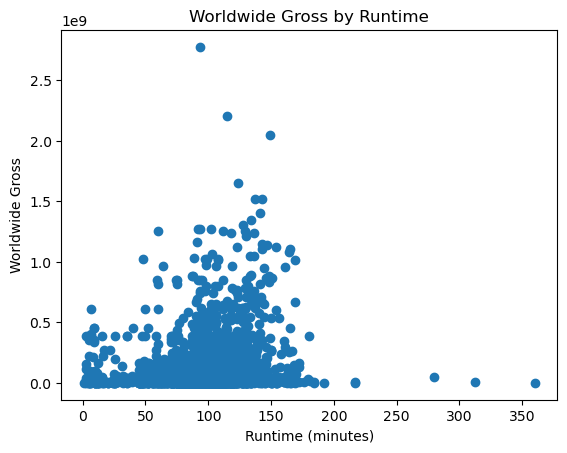

In [23]:
# Create a scatter plot
plt.scatter(df['runtime_minutes'], df['worldwide_gross'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Runtime')
plt.show()

# TOP COUNT BY STUDIO

In [6]:
pd.read_sql("""
    SELECT COUNT(title) AS total_count, studio,  production_budget, worldwide_gross
    FROM box_office_mojo AS b
    JOIN tn_movie_budgets AS t
        ON b.title = t.movie
        
    GROUP BY studio
    ORDER BY total_count DESC
    LIMIT 25
""", conn)

,total_count,studio,production_budget,worldwide_gross
0,117,Uni.,"$69,000,000","$543,464,573"
1,108,Fox,"$155,000,000","$418,186,950"
2,100,WB,"$160,000,000","$835,524,642"
3,74,Sony,"$40,000,000","$351,774,938"
4,72,Par.,"$170,000,000","$621,156,389"
5,70,BV,"$200,000,000","$1,068,879,522"
6,54,LGF,"$82,000,000","$268,268,174"
7,38,Wein.,"$1,000,000","$16,566,240"
8,36,WB (NL),"$95,000,000","$294,680,778"
9,36,FoxS,"$13,000,000","$331,266,710"


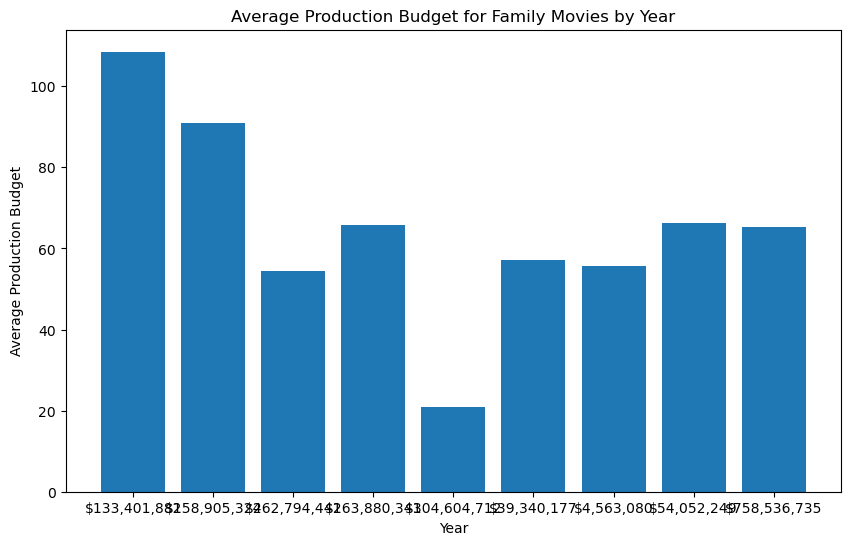

In [9]:
df = pd.read_sql("""
WITH RECURSIVE split(genre, str) AS (
    SELECT '', genres || ',' FROM movie_basics
    UNION ALL SELECT
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
) 
SELECT AVG(CAST(REPLACE(production_budget, '$', '') AS INTEGER)) AS avg_production_budget, worldwide_gross
       year
FROM split
JOIN movie_basics AS m ON instr(genres, genre) > 0
JOIN tn_movie_budgets AS t ON m.primary_title = t.movie
JOIN box_office_mojo AS b ON b.title = t.movie
WHERE genre ='Family' 
GROUP BY year
ORDER BY year;
""", conn)


# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['avg_production_budget'], )
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget for Family Movies by Year')
plt.show()

#SCREWED UP THE X-AXIS

# AVERAGE PRODUCTION BUDGETS AND WORLDWIDE GROSS COMPARISONS

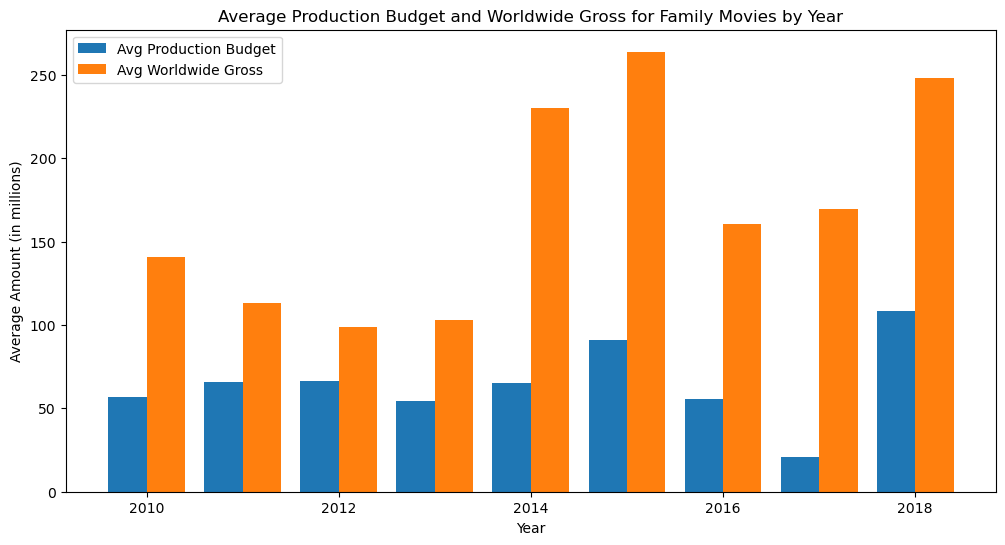

In [13]:
df = pd.read_sql("""
WITH RECURSIVE split(genre, str) AS (
    SELECT '', genres || ',' FROM movie_basics
    UNION ALL SELECT
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
) 
SELECT AVG(CAST(REPLACE(production_budget, '$', '') AS INTEGER)) AS avg_production_budget,
       AVG(CAST(REPLACE(worldwide_gross, '$', '') AS INTEGER)) AS avg_worldwide_gross,
       year
FROM split
JOIN movie_basics AS m ON instr(genres, genre) > 0
JOIN tn_movie_budgets AS t ON m.primary_title = t.movie
JOIN box_office_mojo AS b ON b.title = t.movie
WHERE genre ='Family' 
GROUP BY year
ORDER BY year;

""", conn)

# Plotting the data
plt.figure(figsize=(12, 6))

# Double bar graph
plt.bar(df['year'] - 0.2, df['avg_production_budget'], width=0.4, label='Avg Production Budget')
plt.bar(df['year'] + 0.2, df['avg_worldwide_gross'], width=0.4, label='Avg Worldwide Gross' )

plt.xlabel('Year')
plt.ylabel('Average Amount (in millions)')
plt.title('Average Production Budget and Worldwide Gross for Family Movies by Year')
plt.legend()
plt.show()

In [12]:
pd.read_sql("""
WITH RECURSIVE split(genre, str) AS (
    SELECT '', genres || ',' FROM movie_basics
    UNION ALL SELECT
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
) 
SELECT studio,
       COUNT(*) AS total_movies,
       AVG(CAST(REPLACE(production_budget, '$', '') AS INTEGER)) AS avg_production_budget,
       AVG(CAST(REPLACE(worldwide_gross, '$', '') AS INTEGER)) AS avg_worldwide_gross
FROM (
    SELECT studio,
           CAST(REPLACE(production_budget, '$', '') AS INTEGER) AS production_budget,
           CAST(REPLACE(worldwide_gross, '$', '') AS INTEGER) AS worldwide_gross
    FROM split
    JOIN movie_basics AS m ON instr(genres, genre) > 0
    JOIN tn_movie_budgets AS t ON m.primary_title = t.movie
    JOIN box_office_mojo AS b ON b.title = t.movie
    WHERE genre ='Family' 
) AS filtered_data
GROUP BY studio
ORDER BY total_movies ASC;  



""", conn)
#NEED TO FIX MOVIE COUNT // SORT NOT WORKING ANYMORE

,studio,total_movies,avg_production_budget,avg_worldwide_gross
0,Eros,6227,10.000000,18.000000
1,Focus,6227,15.000000,59.000000
2,FoxS,6227,17.000000,7.000000
3,Free,6227,90.000000,20.000000
4,ORF,6227,10.000000,4.000000
5,Rela.,6227,13.000000,42.000000
6,SPC,6227,13.000000,11.000000
7,Studio 8,6227,51.000000,99.000000
8,Sum.,6227,35.000000,39.000000
9,Viv.,6227,3.000000,3.000000
